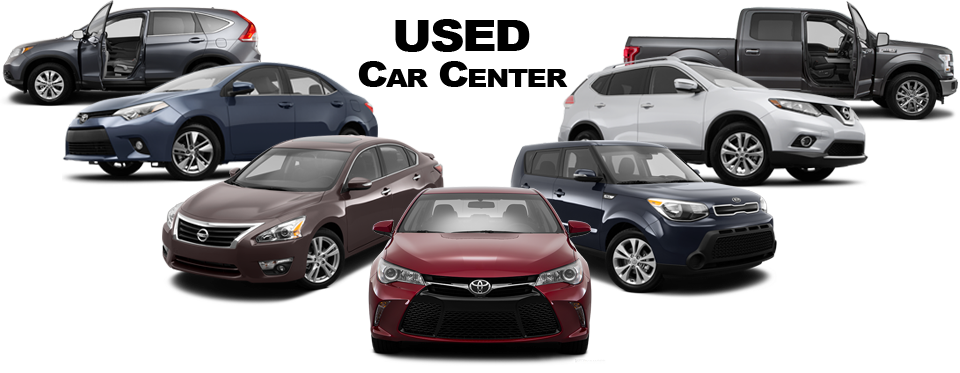

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#Downloading dataset from Kaggle 
api.dataset_download_files('nehalbirla/vehicle-dataset-from-cardekho') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [4]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('vehicle-dataset-from-cardekho.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [5]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

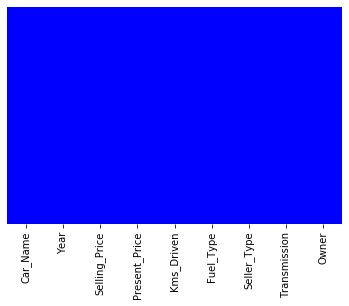

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='winter'); # no null values

In [9]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
ciaz                          9
innova                        9
grand i10                     8
amaze                         7
Royal Enfield Classic 350     7
jazz                          7
ertiga                        6
eon                           6
sx4                           6
i10                           5
alto k10                      5
swift                         5
Royal Enfield Thunder 350     4
etios liva                    4
wagon r                       4
ritz                          4
Bajaj Pulsar 150              4
dzire                         4
Bajaj Pulsar NS 200           3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
xcent                         3
etios g                       3
                             ..
Bajaj Do

In [11]:
df.Fuel_Type.unique() #cng compressed natural gas

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [12]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [13]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df.Owner.unique()


array([0, 1, 3], dtype=int64)

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Selling Price Based on Fuel type and Transmission

In [16]:
df.groupby(['Fuel_Type','Transmission'])['Selling_Price'].mean()

Fuel_Type  Transmission
CNG        Manual           3.100000
Diesel     Automatic       20.699167
           Manual           7.673333
Petrol     Automatic        4.586071
           Manual           3.088768
Name: Selling_Price, dtype: float64

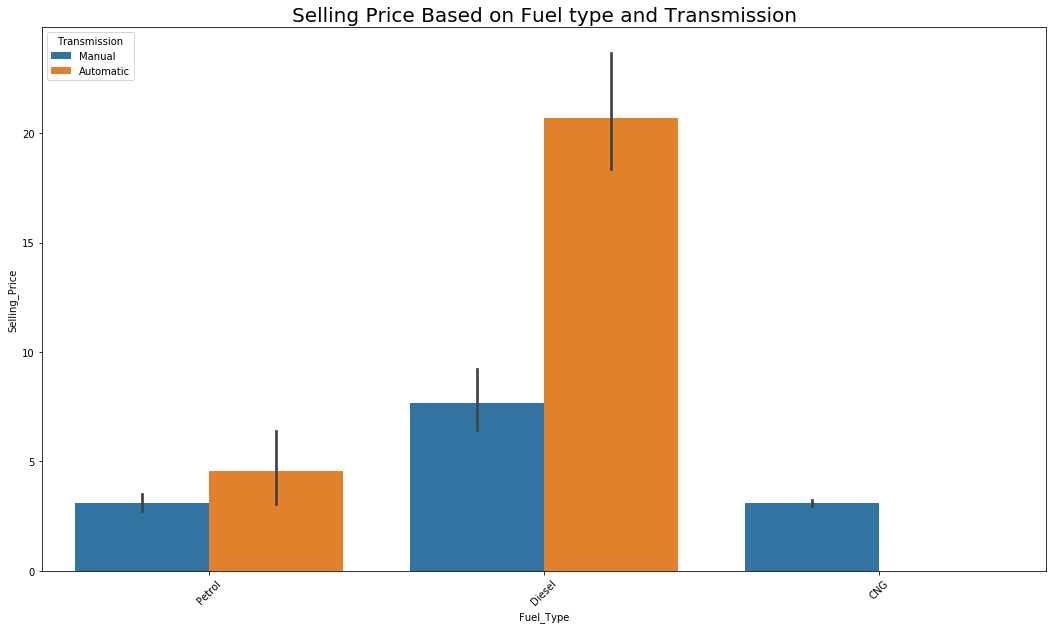

In [17]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Fuel_Type'],y=df['Selling_Price'],hue=df['Transmission'])
plt.title('Selling Price Based on Fuel type and Transmission',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Automatic transmission selling price is higher than the manual transmission 

## Selling Price Based on Year and Type of Owner

In [18]:
df.groupby(['Year','Owner'])['Selling_Price'].mean()

Year  Owner
2003  0        1.300000
2004  0        1.500000
2005  0        2.487500
2006  0        1.083333
      3        2.500000
2007  0        0.120000
      1        0.200000
2008  0        1.128333
      1        0.250000
2009  0        2.816667
2010  0        5.406429
      1        3.250000
2011  0        2.498889
      1        0.150000
2012  0        4.006818
      1        0.200000
2013  0        3.645313
      1        0.200000
2014  0        4.875278
      1        2.725000
2015  0        5.946667
      1        4.750000
2016  0        5.212449
      1        5.250000
2017  0        6.209143
2018  0        9.250000
Name: Selling_Price, dtype: float64

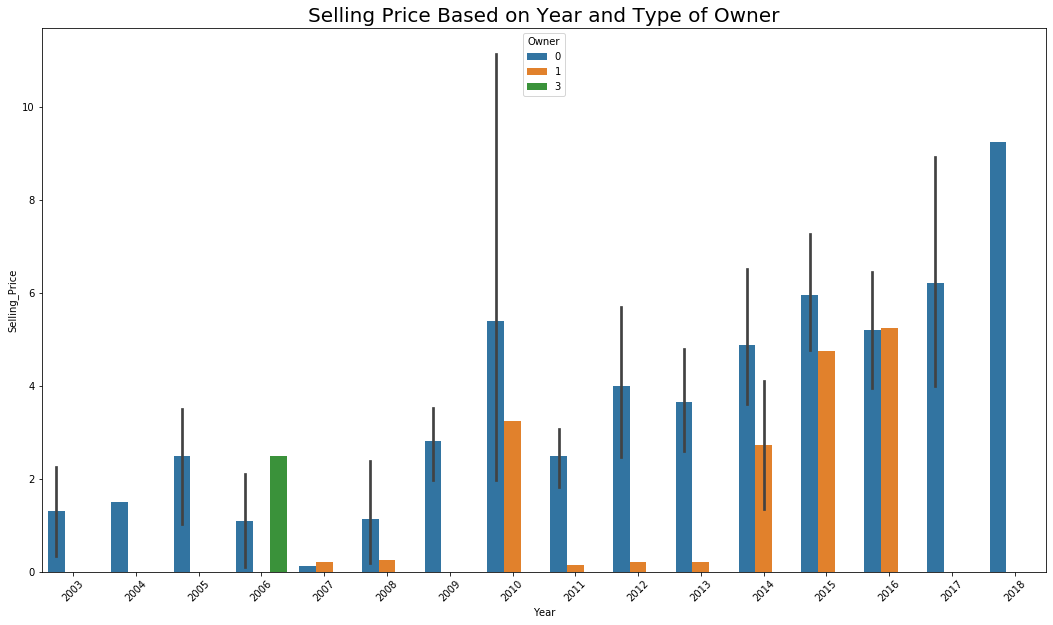

In [19]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Year'],y=df['Selling_Price'],hue=df['Owner'])
plt.title('Selling Price Based on Year and Type of Owner',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [20]:
df.groupby(['Car_Name','Year','Present_Price'])['Selling_Price'].mean() 
#calculating mean of selling price based on Car_Name,Year,Present_price

Car_Name                  Year  Present_Price
800                       2003  2.280            0.3500
Activa 3g                 2008  0.520            0.1700
                          2016  0.540            0.4500
Activa 4g                 2017  0.510            0.4000
Bajaj  ct 100             2015  0.320            0.1800
Bajaj Avenger 150         2016  0.800            0.7500
Bajaj Avenger 150 street  2016  0.800            0.6000
Bajaj Avenger 220         2016  0.950            0.7200
                          2017  0.950            0.8250
Bajaj Avenger 220 dtsi    2010  0.950            0.4500
                          2015  0.950            0.6000
Bajaj Avenger Street 220  2011  0.950            0.4500
Bajaj Discover 100        2013  0.470            0.2700
Bajaj Discover 125        2011  0.570            0.1500
                          2012  0.570            0.2000
Bajaj Dominar 400         2017  1.600            1.4500
Bajaj Pulsar  NS 200      2014  0.990            0.6000
Ba

In [21]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [22]:
#df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [23]:
#fuel_type_dummy=pd.get_dummies(df['Fuel_Type'],drop_first=True)

In [24]:
#transmission_dummy=pd.get_dummies(df['Transmission'],drop_first=True) 

In [25]:
#df['Fuel_Type'].value_counts()

In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
df=df.drop(['Car_Name'],axis=1)

In [28]:
#seller_dummy=pd.get_dummies(df['Seller_Type'],drop_first=True) # one hot encoding

In [29]:
#df=pd.concat([fuel_type_dummy,seller_dummy,transmission_dummy,df],axis=1)

In [30]:
df=pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [32]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [33]:
df.Year=2021-df.Year

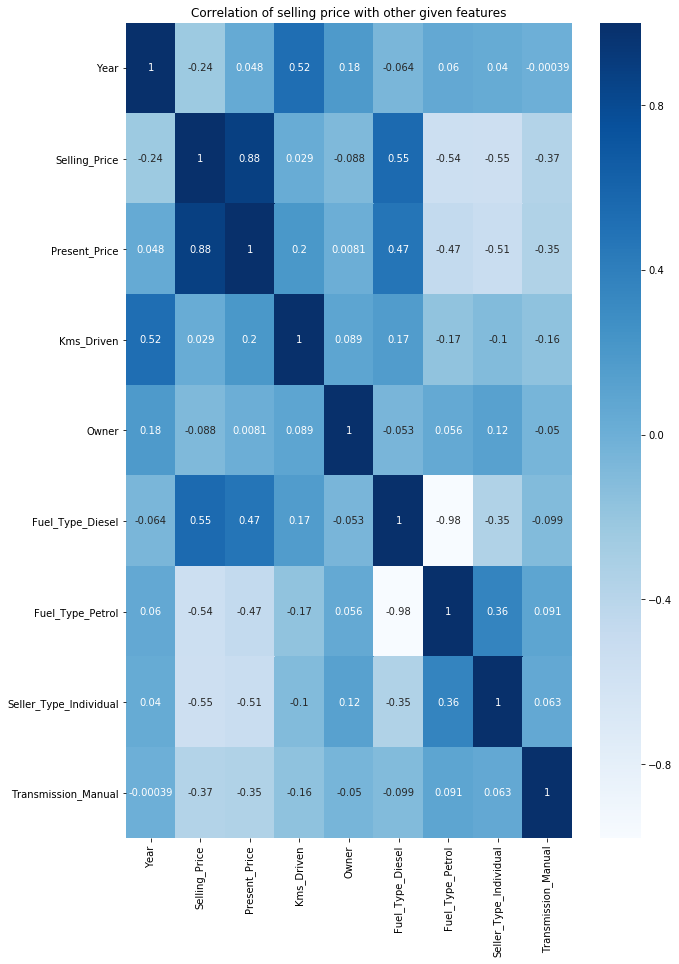

In [34]:
#Heatmap displaying correalation between each attributes
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues');
plt.title('Correlation of selling price with other given features');
plt.show()

In [35]:
# selling price is positively correlated with present price,diesel and year

In [36]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [37]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,5.59,27000,0,0,1,0,1
1,8,9.54,43000,0,1,0,0,1
2,4,9.85,6900,0,0,1,0,1
3,10,4.15,5200,0,0,1,0,1
4,7,6.87,42450,0,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Splitting the dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
scores=[]

## LinearRegression

In [41]:
linreg=LinearRegression()

In [42]:
linreg.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred_linreg=linreg.predict(X_test)

In [44]:
scores.append(('LinearRegression',r2_score(y_test,y_pred_linreg)))

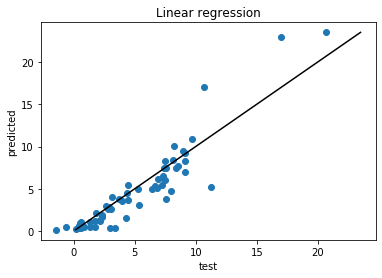

In [45]:
plt.scatter(y_pred_linreg,y_test)
plt.title('Linear regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

## Lasso regression

In [46]:
lass=Lasso()
lass.fit(X_train,y_train)
y_lass_predicted=lass.predict(X_test)
scores.append(('Lasso Regression',r2_score(y_test,y_lass_predicted)))
#rms.append(np.sqrt(mean_squared_error(y_test,y_lass_predicted)))

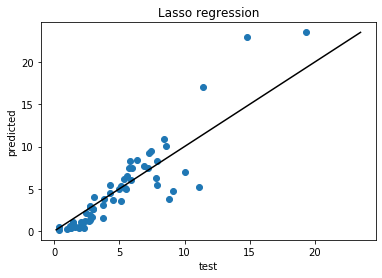

In [47]:
plt.scatter(y_lass_predicted,y_test)
plt.title('Lasso regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Ridge regression

In [48]:
rd=Ridge()
rd.fit(X_train,y_train)
y_rd_predicted=lass.predict(X_test)
scores.append(('Ridge Regression',r2_score(y_test,y_rd_predicted)))

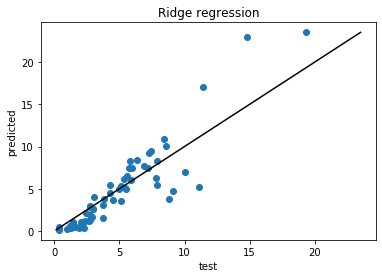

In [49]:
plt.scatter(y_rd_predicted,y_test)
plt.title('Ridge regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

## Random Forest Regression

In [50]:
rfr=RandomForestRegressor(random_state=41)
rfr.fit(X_train,y_train)
y_rfr_predicted=rfr.predict(X_test)
scores.append(('Random Forest Regression',r2_score(y_test,y_rfr_predicted)))

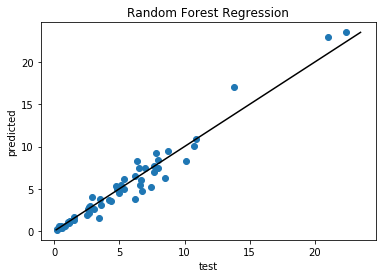

In [51]:
plt.scatter(y_rfr_predicted,y_test)
plt.title('Random Forest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

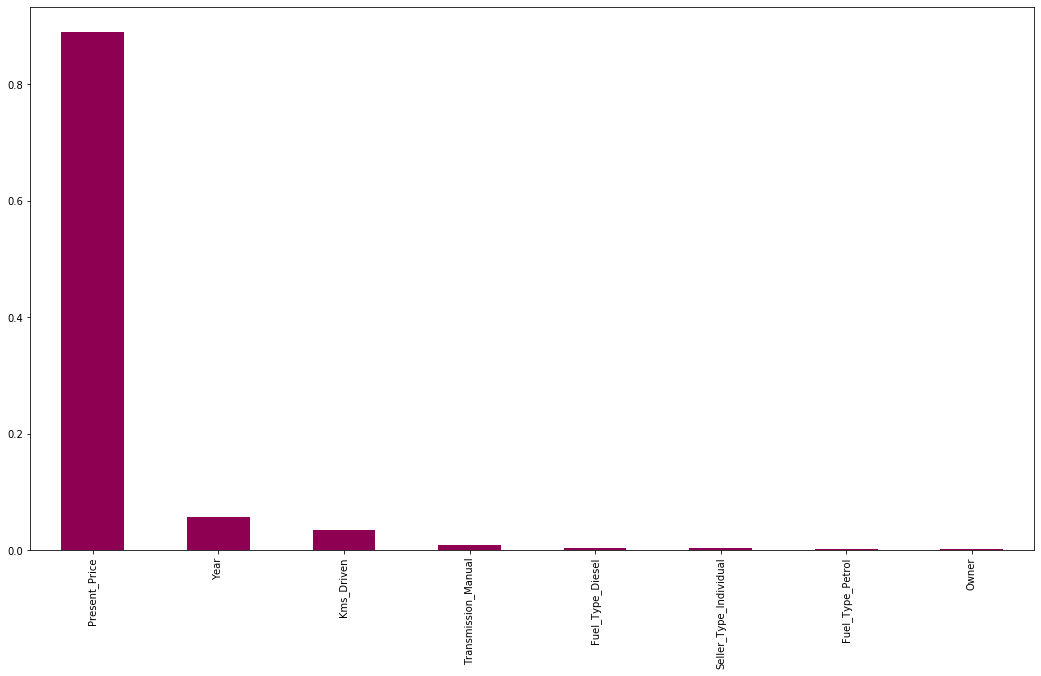

In [52]:
pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

## Decision Tree Regression

In [53]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr_predicted=dtr.predict(X_test)
scores.append(('Decision Tree Regression',r2_score(y_test,y_dtr_predicted)))

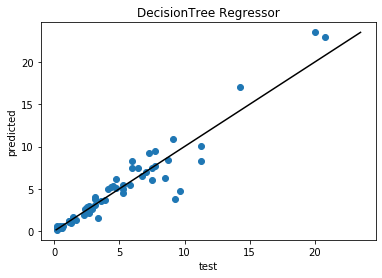

In [54]:
plt.scatter(y_dtr_predicted,y_test)
plt.title('DecisionTree Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

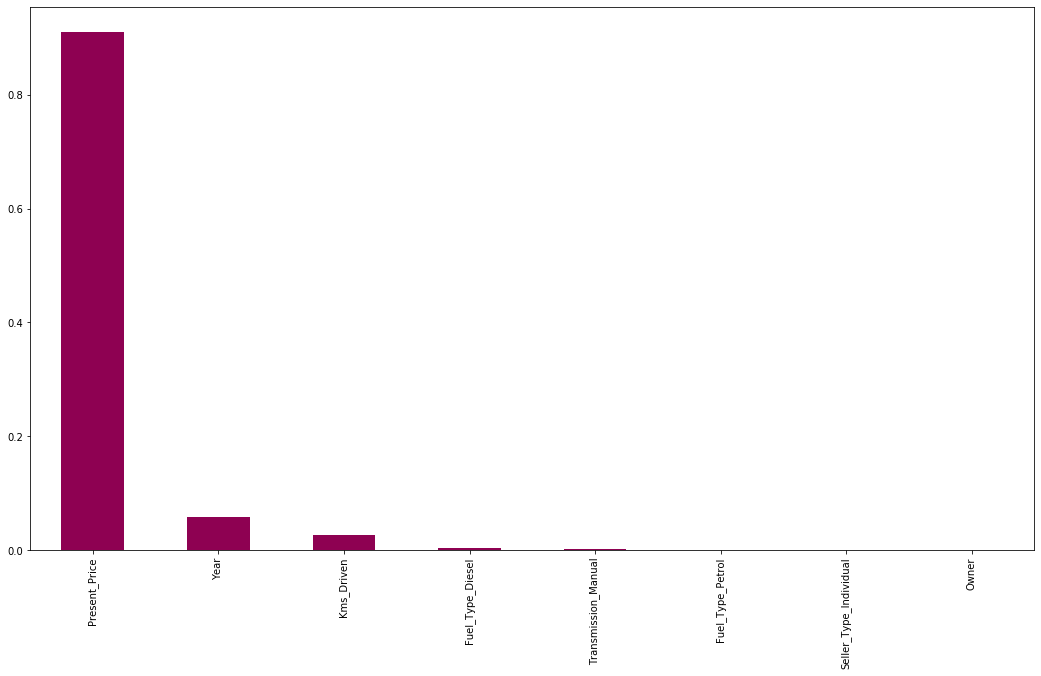

In [55]:
pd.Series(dtr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

In [56]:
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)
y_pred_extr=extr.predict(X_test)
scores.append(('ExtraTreesRegressor',r2_score(y_test,y_pred_extr)))


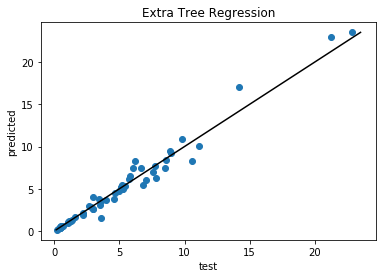

In [57]:
plt.scatter(y_pred_extr,y_test)
plt.title('Extra Tree Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

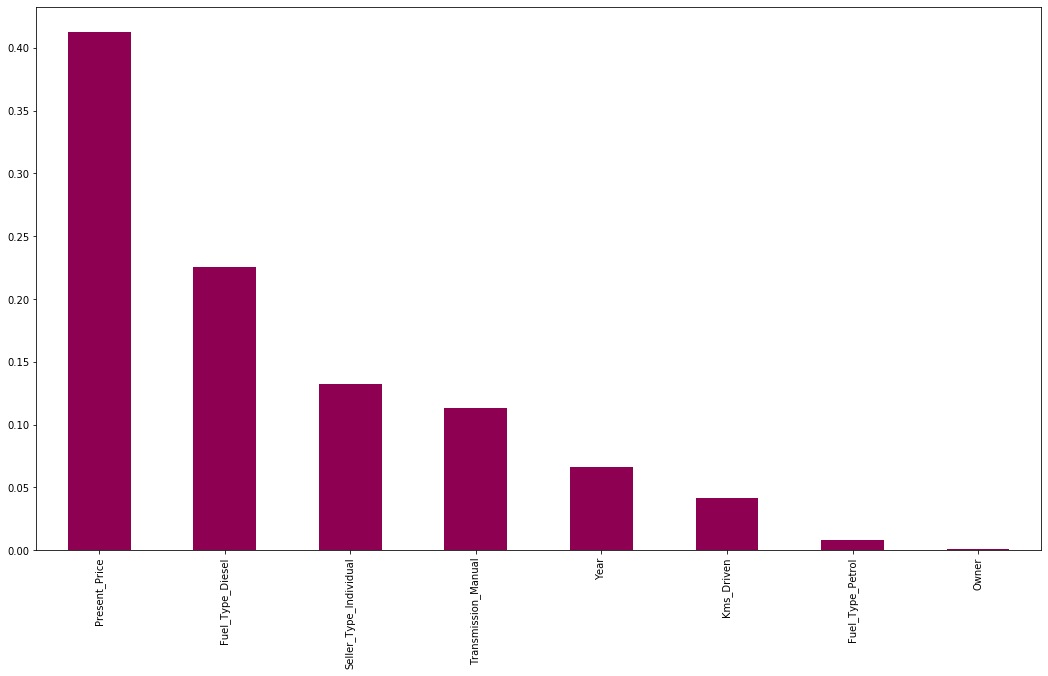

In [58]:
pd.Series(extr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

In [59]:
scores

[('LinearRegression', 0.8489813024897566),
 ('Lasso Regression', 0.7985512461284686),
 ('Ridge Regression', 0.7985512461284686),
 ('Random Forest Regression', 0.9583502587881222),
 ('Decision Tree Regression', 0.9100765451626492),
 ('ExtraTreesRegressor', 0.9709547449533287)]

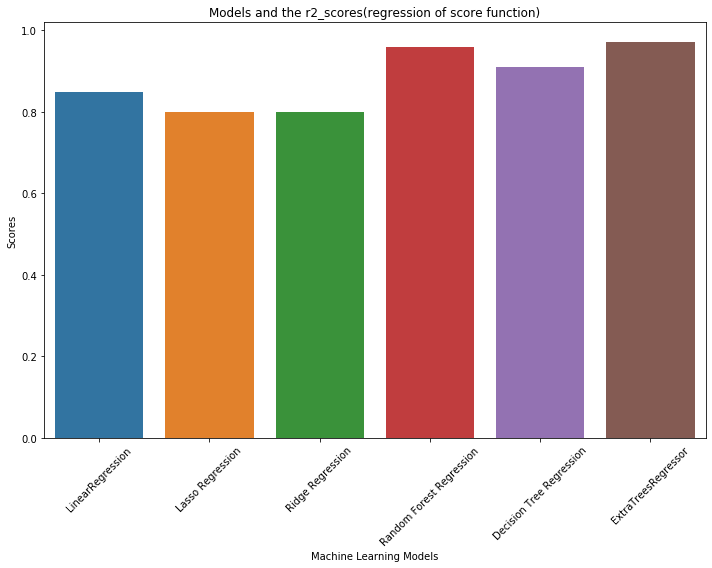

In [60]:
#plotting barplot
df1= pd.DataFrame(scores,columns =['Machine Learning Models', 'Scores']) 
plt.figure(figsize=(10,8))
sns.barplot(x=df1['Machine Learning Models'],y=df1['Scores'])
plt.xticks(rotation=45)

plt.title('Models and the r2_scores(regression of score function)' )
plt.tight_layout()
plt.show()


In [61]:
df.to_csv('car_dataset_deploy')

In [62]:
df2=pd.read_csv('car_dataset_deploy')
df2.columns

Index(['Unnamed: 0', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [63]:
df2.head()

,Unnamed: 0,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,7,3.35,5.59,27000,0,0,1,0,1
1,1,8,4.75,9.54,43000,0,1,0,0,1
2,2,4,7.25,9.85,6900,0,0,1,0,1
3,3,10,2.85,4.15,5200,0,0,1,0,1
4,4,7,4.60,6.87,42450,0,1,0,0,1


In [64]:
df2.Owner.unique()

array([0, 1, 3], dtype=int64)